In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis of defenders in the 2021 MLS season.

### Objective - Gain insight into the data set through multiple technques will allow for key defenders who exemplifiy progressive play metrics generated from feature engineering to be identified. 

The notebook is comprised of 4 sections 

1 Box plots of key features to observe feature distribution.

2 Correlation heat maps and pair grids to gain insight of feature correlation. 

3 Scatters plots of key features to help identify unique defenders. 

4 PCA analysis to show spread of variation among key features. 

5 Identifed defender list. 

In [ ]:
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.

In [14]:
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.rename(columns={'prog_carry+lng_comp+crosses':'Progressive_play'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 110 entries, fb_id to attacking_touches
dtypes: float64(102), int64(1), object(7)
memory usage: 606.0+ KB


In [15]:
# create defender only df 
defenders = df.loc[(df['Position']=='DF')&( df['Nineties'] >5)]

## 1 Box plot of key features 

### feature definitions 

 Tackle tackle pct = pAdj_total
pAdj_Total_tackles / ( pAdj_Total_tackles + lost_tackles +pAdj_Num_Dribbled_past + pAdj_Fouls ) to better represent players' impact through tackling.

Attacking touches = touches in the attacking third + touches in attacking box+ number of players dribbled past + carries in the attacking third + carries in the attacking box. To help evaluate who effectively moves the ball up the field and is involved in the attack.

Progressive play is measured by  = progressive carries + completed long balls + Crosses. This metric give insight into volumne of key attacking actions to drive the play down the field. 



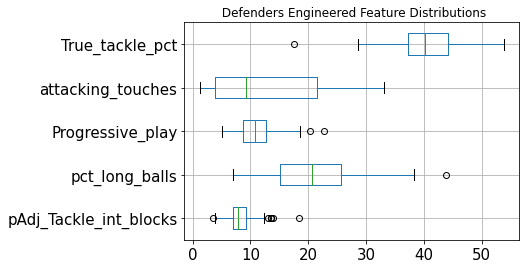

In [16]:
#use boxplot to observe outliers - key for anamoly dection 
boxplot = defenders[[
    # feature generated 
    'pAdj_Tackle_int_blocks','pct_long_balls','Progressive_play','attacking_touches','True_tackle_pct'
]].boxplot(grid = True,vert=False,fontsize=15).set(title=' Defenders Engineered Feature Distributions')
plt.show()

## 1 Box Plot Insight 

- True tackle percentage for defenders on average is about 40 %

- there are more outliers in tackles interceptions blocks than any other metric

- Attacking touches has a large right tail with the average below ten and the top quartile being above double that at 20 + attacking touches. This shows there are two distinct defensive profiles where half are not continuasly involved in the attack while half are asked to get into the attack at twice the volume of their counterparts. 

## 2 Correlation heat maps and pair grids 

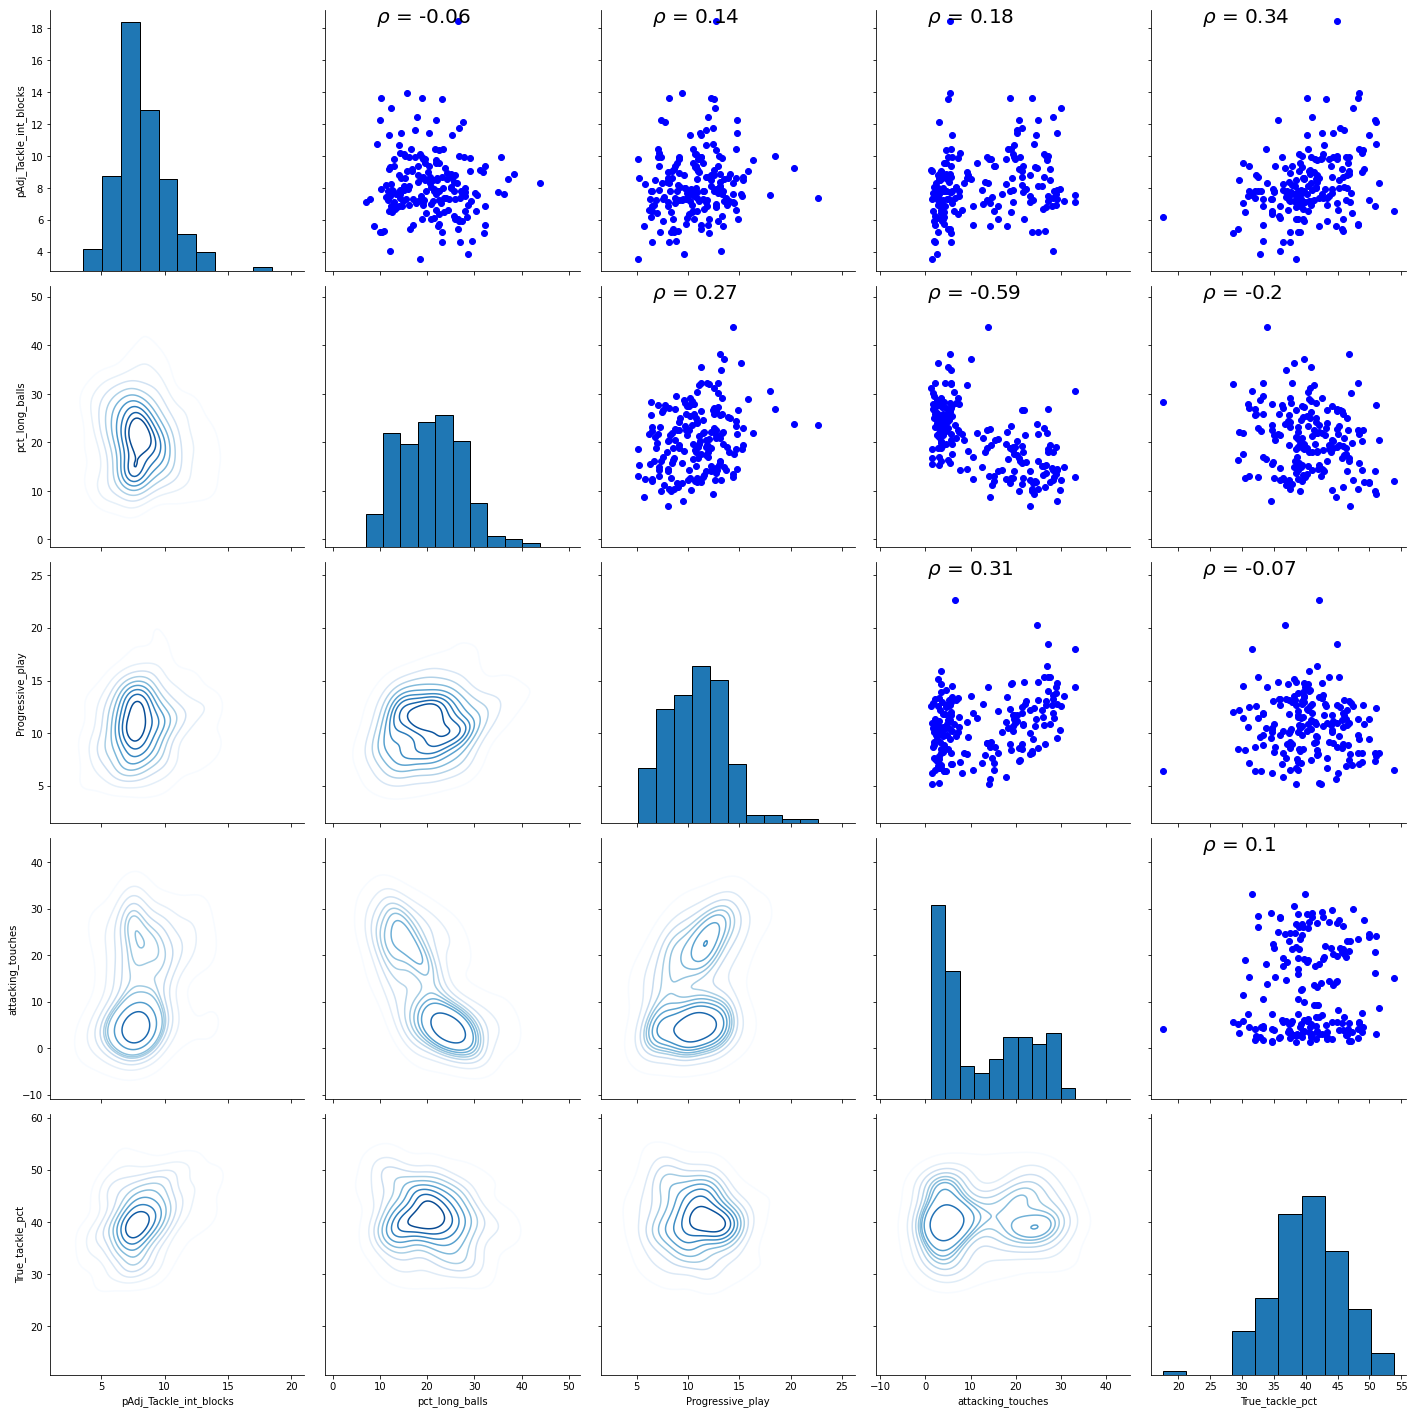

In [31]:
data =defenders[['pAdj_Tackle_int_blocks','pct_long_balls','Progressive_play','attacking_touches','True_tackle_pct'
]]
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= data,vars = ['pAdj_Tackle_int_blocks','pct_long_balls','Progressive_play','attacking_touches','True_tackle_pct'], size = 4)

# # Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'Blue')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', );

## 2 Insight from Pair grid
- Percent long balls and attacking touches have a strong inverse relationship showing players who play long balls at a high frequency at not taking touches in advnaced area of the field. 
- The KDE plots show that attacking touches shows two clusters of players when compared to the other metrics while the other KDE plots show a singular central value that most players are around. 

## 2.1 Heatmap 

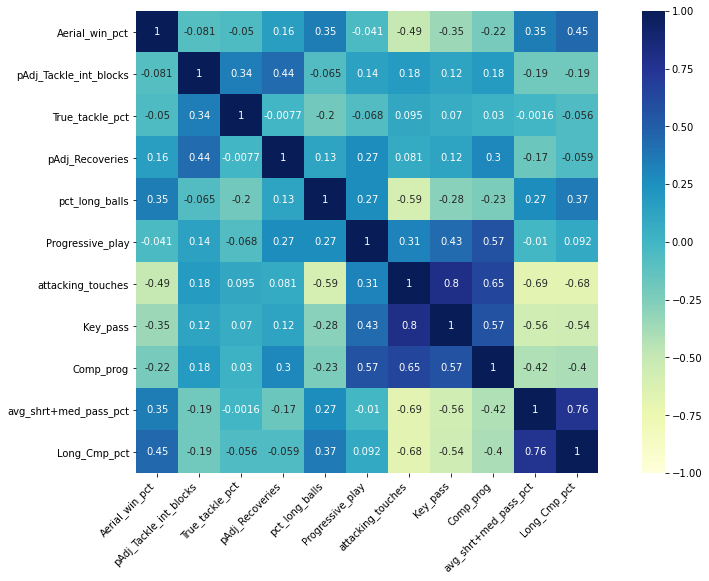

In [32]:
corr = defenders[['Aerial_win_pct','pAdj_Tackle_int_blocks','True_tackle_pct','pAdj_Recoveries','pct_long_balls','Progressive_play','attacking_touches','Key_pass',
 'Comp_prog','avg_shrt+med_pass_pct','Long_Cmp_pct']].corr()

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8.5)

ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap="YlGnBu",annot=True,square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');


## 2.1 Heat map insight - 
- Key passes and attacking touches have a high correlation as most key passes to create goal scoring changes will be where attacking touches are made.
- Completed progressive pass and average short+ medium pass pct are inversely correlated pointing towards players who complete more progressive passes have lower avg pass pct as they try to play dangerous passes that progress the team attack forward.
-  The three defensive features True tackle pct, tackle int blocks and recoveries  are correlated to each other but not to the other more offensive minded features. 
- Aerial win percentage is most correlated with long completion pct high lighting two major defensive actions sought after in the league in defenders. 


## 2.3 Passing features boxplots

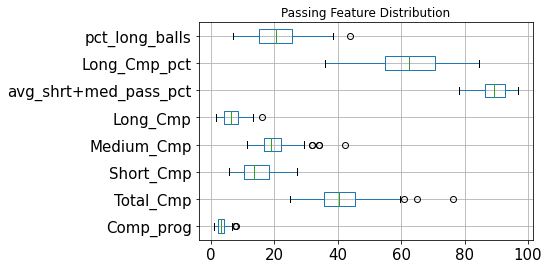

In [35]:
data = defenders[[ 'Comp_prog','Total_Cmp','Short_Cmp','Medium_Cmp','Long_Cmp','avg_shrt+med_pass_pct','Long_Cmp_pct','pct_long_balls',
 ]]
boxplot = data.boxplot(grid = True,vert=False,fontsize=15).set(title='Passing Feature Distribution')
plt.show()

### 2.3 insight 
- Long completion percentage is on average much lower than short and medium passing percetage. Long balls are inherently more diffucult to complete but the defenders at the high end of the spectrum are always sought after.
- having the averages of passing features allows for better comparison of players. 

## 3 Scatter plots of key features to identify distictive defenders

- Walker Zimmerman the 2020, 2021 MLS defender of the year is plotted on all graphs for context. 

3.1 Aerial win percentage Vs Tackles Interceptions Blocks - how involved is this player in key defensive actions?

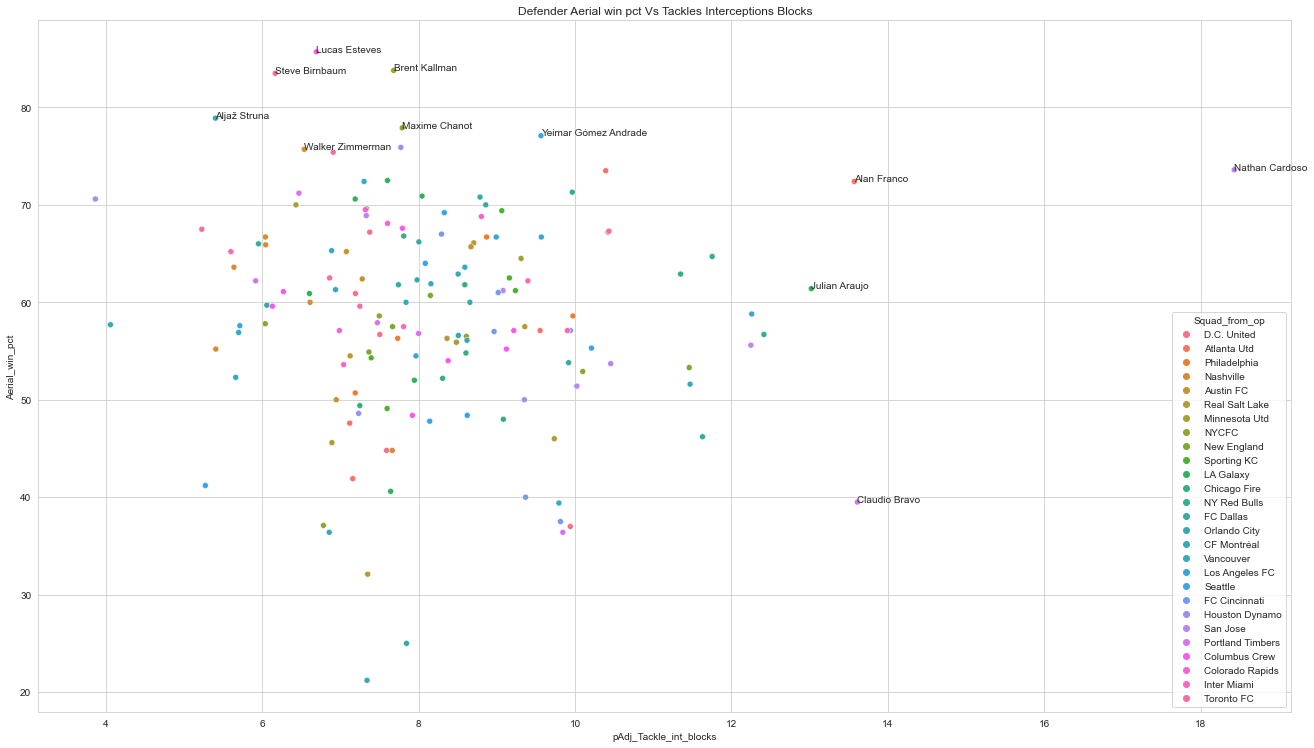

In [36]:
graph = defenders.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>10)]
sns.set_style('whitegrid')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
x =graph['pAdj_Tackle_int_blocks']
y = graph['Aerial_win_pct']
p = graph['player_name']

g = sns.scatterplot(data=graph, x =x, y=y ,
                    hue='Squad_from_op',
                ax=ax).set(title='Defender Aerial win pct Vs Tackles Interceptions Blocks')
for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 77:
         plt.annotate(p, (x, y))
    if x > 13:
        plt.annotate(p,(x,y))

plt.tight_layout()

### 3.1 insignt
#### players highlighted 
- Julian Araujo , La Galaxy Right Back
- Alan Franco, Atlanta united Center Back
- Nathan Cordoso, San Jose earthquakes Center Back

- all three are directly involved in defending on the ball actions at a high rate. This could be due to the systems they play in and the lack of cover from their midfielders infront of them. 

### 3.2  True Tackle pct  Vs Tackle Interceptions Blocks - Who are the most effective tackelers in the league?

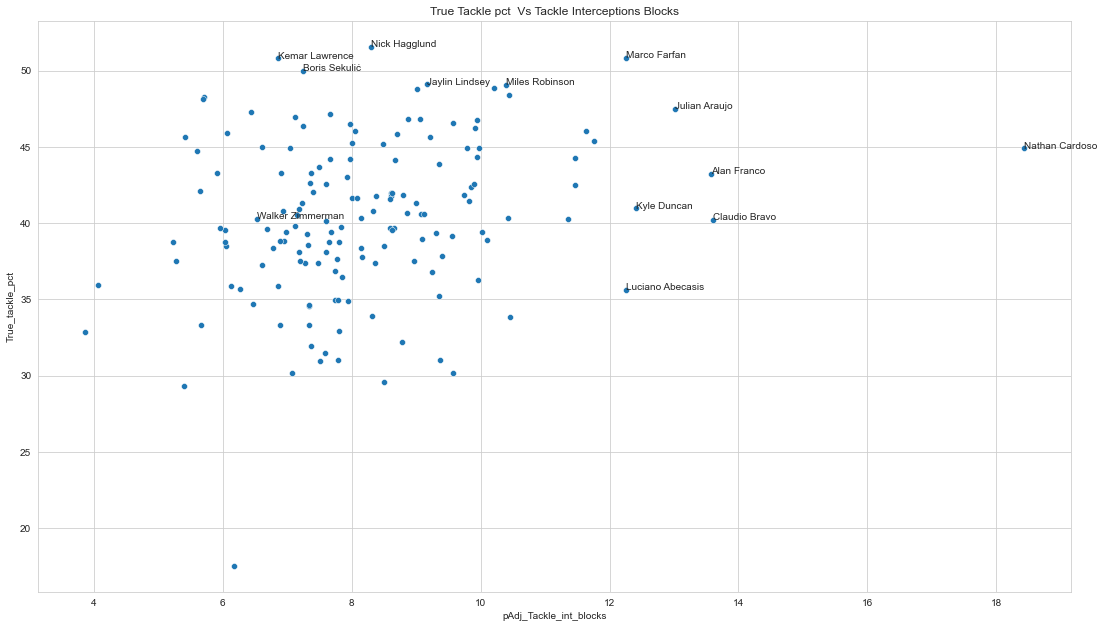

In [40]:

graph = defenders.loc[(df['Position']=='DF')&(df['Nineties']>10)]



fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)


x = graph['pAdj_Tackle_int_blocks']
y = graph['True_tackle_pct']
p = graph['player_name']

g = sns.scatterplot(data=graph, x=x,y =y,
#                     hue='Squad_from_op',
                ax=ax).set(title='True Tackle pct  Vs Tackle Interceptions Blocks')


for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 49:
         plt.annotate(p, (x, y))
    elif x > 12:
        plt.annotate(p,(x,y))


#### 3.2 Insight 
- Julian Araujo ,Alan Franco, Nathan Cordoso, all return to the top left of the graph.
- Claudio Bravo and Marco Farfan, both MLS cul finalist with the Portland Timbers outside backs arive at the top left of the graph. 

### 3.3 Attacking touches Vs Key pass - Who is involved in the attack and how impactful are they in creating chances? 

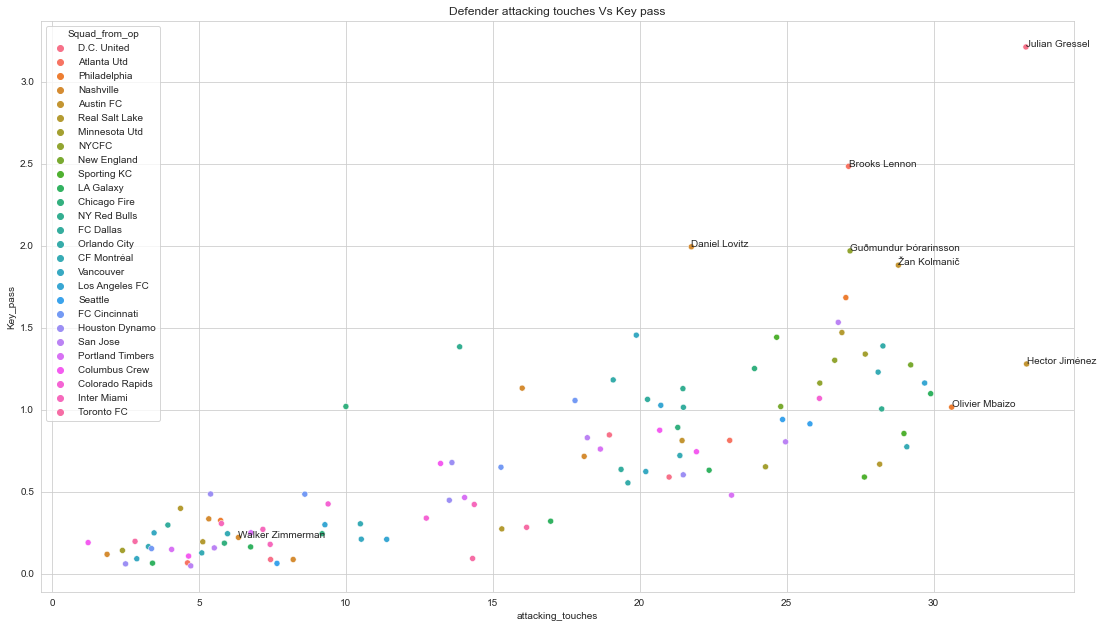

In [38]:

graph = df.loc[(df['Crosses']>.1)&(df['Position']=='DF')&(df['Nineties']>10)]


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

x = graph['attacking_touches']
y = graph['Key_pass']
p = graph['player_name']

g = sns.scatterplot(data=graph, x=x,y =y,hue='Squad_from_op',
                ax=ax).set(title='Defender Attacking touches Vs Key pass')


for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 1.8:
         plt.annotate(p, (x, y))
    elif x > 30:
        plt.annotate(p,(x,y))

### 3.3 Insight -
- highlited players 1) Gulian Gressel, D.C. United Wing back  2) Brooks Lennon, Atlanta United Full-back 
- both are getting above 25 touches in attacking positions per game while also averaging above 2.5 key passes to create scoring changes showing them selfs to be effective at going forward. 

### 3.4 Progressive play Vs attacking touches - who is invloved in the attack?

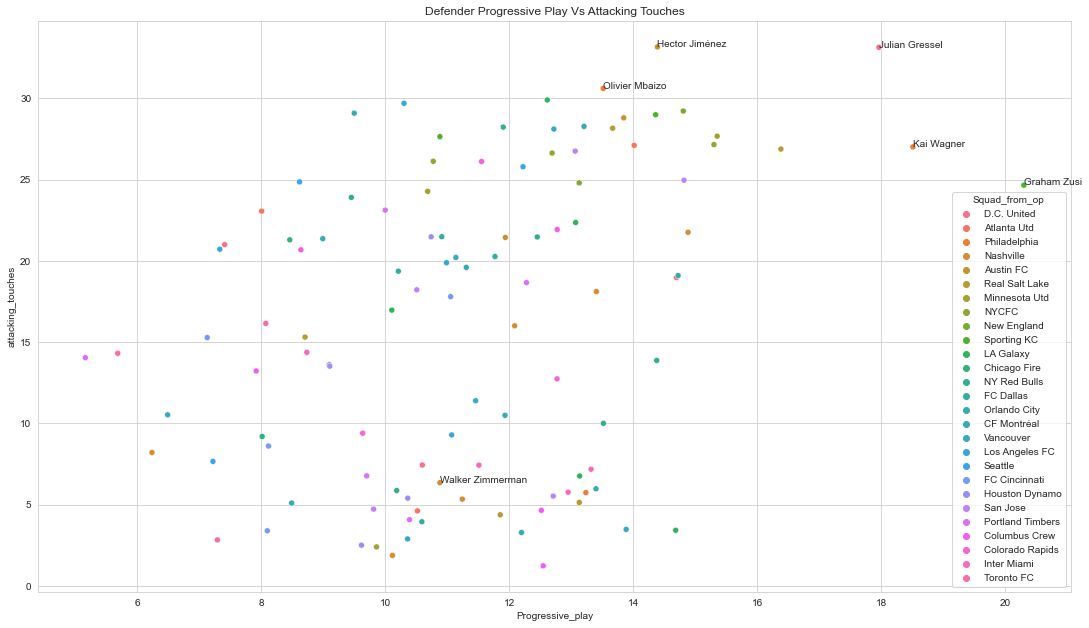

In [44]:
graph = df.loc[(df['Crosses']>.1)&(df['Position']=='DF')&(df['Nineties']>10)]
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

x = graph['Progressive_play']
y = graph['attacking_touches']
p = graph['player_name']
g = sns.scatterplot(data=graph, x=x,y =y,hue='Squad_from_op',
                ax=ax).set(title='Defender Progressive Play Vs Attacking Touches')

for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 30:
         plt.annotate(p, (x, y))
    if x > 18:
        plt.annotate(p,(x,y))


### 3.4 Insight 
- Highlighted players 1) Hector Jimenez, Austin FC multiple positions 2) Julian Gressel retruns 3) Kai Wagner, Philadelphia Union 2021 MLS all star left back 4) Graham Zusi Sporting Kansas City converted right back
- These players attempt to progress the ball forward for their teams as well as receive the ball in attacking positions highlighting them as some of the most involved attacking defenders. 



### 3.5 Long Ball Completions Vs Long Competion Percent - Who is effectivly stretching the field vertically ?

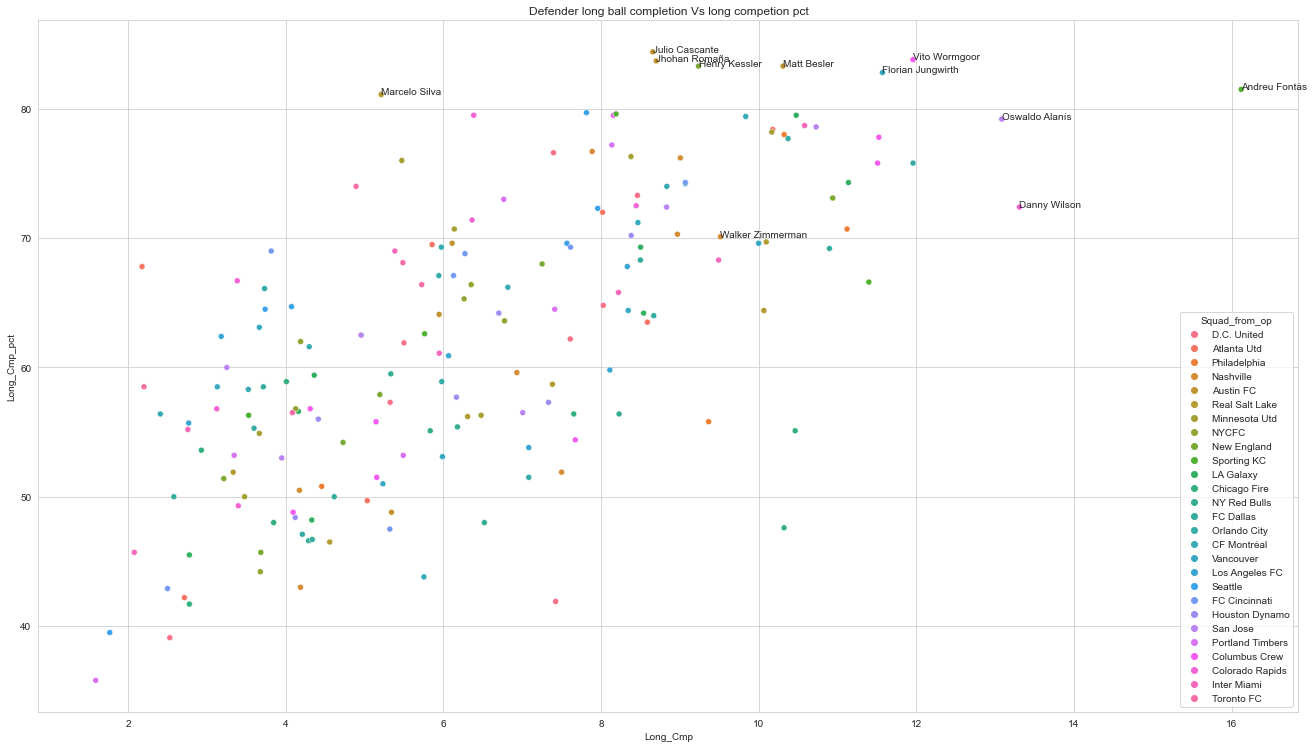

In [21]:
graph = df.loc[(df['pAdj_Tackle_int_blocks']<35)&(df['Position']=='DF')&(df['Aerial_win_pct']<100)&
               (df['Aerial_win_pct']>0)&(df['Nineties']>5)]
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

g = sns.scatterplot(data=graph, x ='Long_Cmp', y='Long_Cmp_pct',hue='Squad_from_op',
                ax=ax).set(title='Defender Long Ball Completions Vs Long Competion Percent')


x = graph['Long_Cmp']
y = graph['Long_Cmp_pct']
p = graph['player_name']
for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 80:
         plt.annotate(p, (x, y))
    elif x > 12:
        plt.annotate(p,(x,y))
    
    
plt.tight_layout()

### 3.5 Insight 
- Andrew Fontas at Sporking Kansas City stands above the rest of the league in these two categories showing he stretches the field effectly with long balls. his seperation from the rest can also be attributed to sytem and team mates that are on the end of these completed long balls.  

## 4 -  PCA of defensive and offensive features to observe spread of variation among players.

### 4.1 PCA on defensive features.

In [45]:
def_stats = defenders[[ 'pAdj_Total_tackles', 'pAdj_Tackles_Won', 'pAdj_Tackles_Def_3rd',
       'pAdj_Tackles_Mid_3rd', 'pAdj_Tackles_Att_3rd',
       'pAdj_Num_Dribblers_tackled', 'pAdj_Num_Dribbled_past',
        'pAdj_Blocks','pAdj_Interceptions', 'pAdj_Clearences',
       'pAdj_Fouls', 'pAdj_def_interceptions',
       'pAdj_Recoveries', 'pAdj_Aerial_Duels_lost',
       'True_tackle_pct', 'pAdj_Tackle_int_blocks']]
names = defenders['player_name']

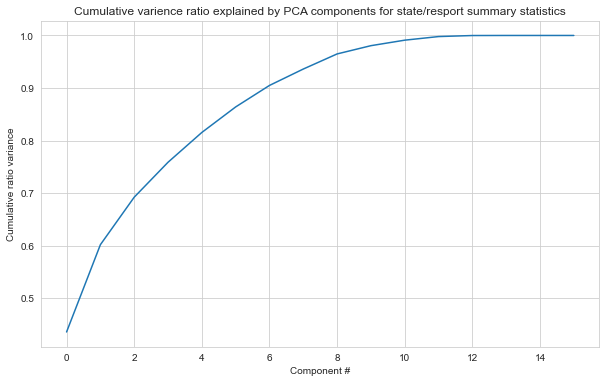

In [46]:
def_stats_scale = scale(def_stats)
def_scaled_df = pd.DataFrame(def_stats_scale, columns=def_stats.columns)
def_pca = PCA().fit(def_stats_scale)

plt.subplots(figsize=(10, 6))
plt.plot(def_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative varience ratio explained by PCA components for state/resport summary statistics');

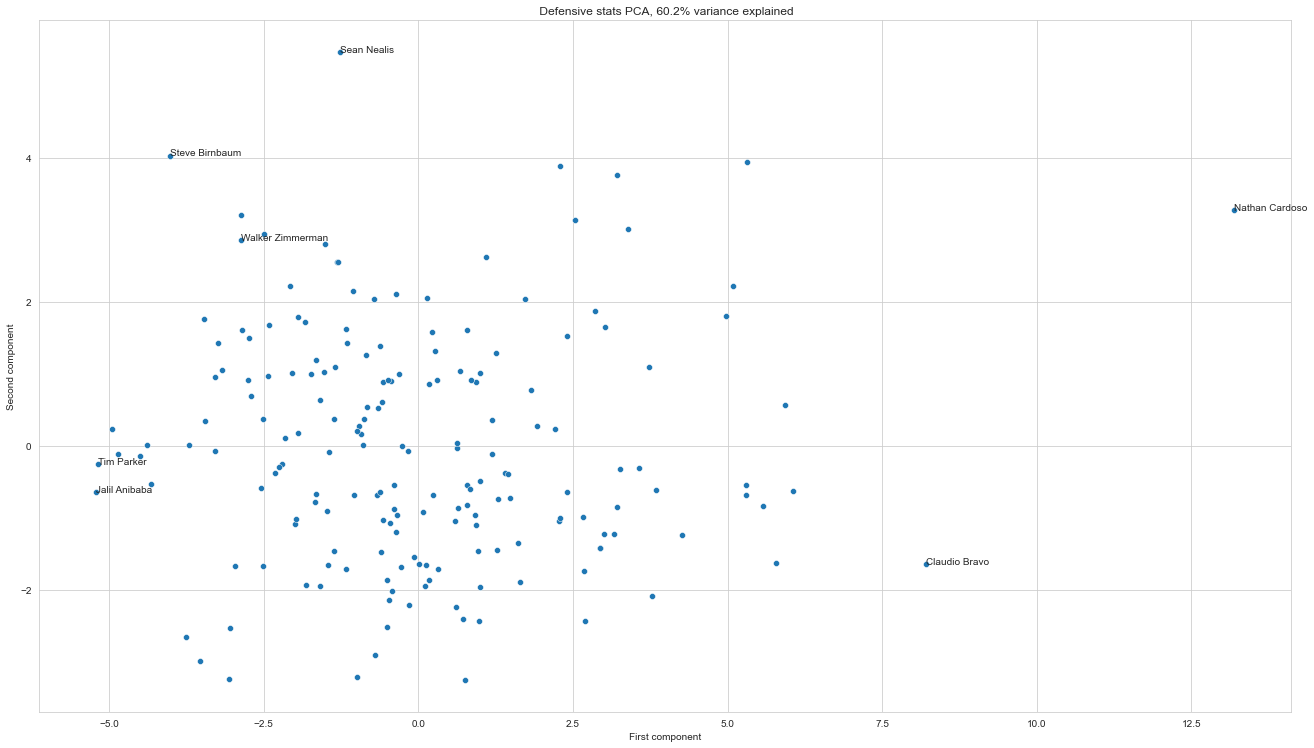

In [62]:
# graph first two components 
def_pca_x = def_pca.transform(def_stats_scale)
def_pca_df = pd.DataFrame(def_pca_x[:,:2])

sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = def_pca_x[:,0:2]
x = def_pca_x[:, 0]
y = def_pca_x[:, 1]
p = names

pc_var = 100 * def_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=def_pca_df, x =x, y=y, ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' Defensive stats PCA, {pc_var:.1f}% variance explained')

for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    if y > 4 or y<-4:
         plt.annotate(p, (x, y))
    if x > 7 or x< -5:
        plt.annotate(p,(x,y))

plt.tight_layout()

### 4.1 Insight
- The first two Defensive PCA components show Nathan Cordoso to have the most varation amounst the defensive features. 

## 4.2 PCA for offensive features.


In [49]:
att_stats = defenders[['Nineties', 'xA',
       'Key_pass', 'Comp_prog', 
        'Total_Prg_Dist', 'Short_Cmp', 'Short_Att',
       'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct',
       'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches',
       'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_box', 'dribble_Succ',
       'dribble_Att', 'dribble_Succ_pct', 'num_dribble_past',
       'dribble_megs', 'carries', 'carries_prog_dist',
       'carries_prog', 'carries_att_3rd', 'carries_att_box',
       'miss_control', 'dispossed', 'recep_targ', 'recep_succ',
       'recept_pct', 'Fouls_drawn', 'Offsides', 'Crosses', 'PK_won',
       'Aerial_win_pct', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'xG', 'npxG',
       'npxG/Sh', 'np:G-xG']]

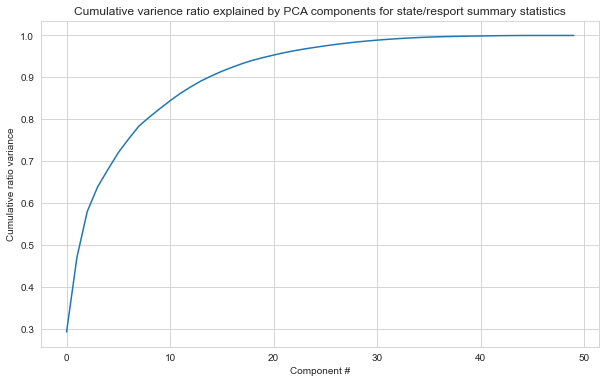

In [61]:
# check variation shown in in PCA components 
att_stats_scale = scale(att_stats)
att_scaled_df = pd.DataFrame(att_stats_scale, columns=att_stats.columns)

att_pca = PCA().fit(att_stats_scale)
att_pca_x = att_pca.transform(att_stats_scale)

plt.subplots(figsize=(10, 6))
plt.plot(att_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative varience ratio explained by PCA components for state/resport summary statistics');

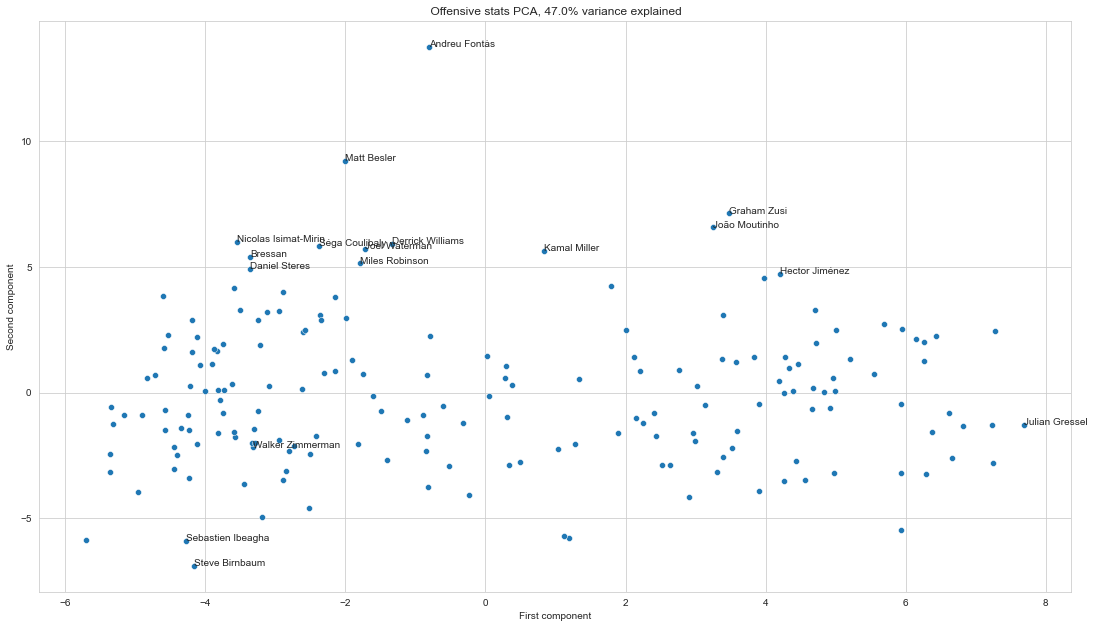

In [60]:
att_pca_df = pd.DataFrame(att_pca_x[:,:2])

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = att_pca_x[:,0:2]
x = att_pca_x[:, 0]
y = att_pca_x[:, 1]
p = names


pc_var = 100 * att_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=att_pca_df, x =x, y=y,ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' Offensive stats PCA, {pc_var:.1f}% variance explained')
for p, x, y in zip(p, x, y):
    if p == 'Walker Zimmerman':
        plt.annotate(p, (x, y))
    elif y > 4.7 or y<-5.9:
         plt.annotate(p, (x, y))
    elif x > 7.6:
        plt.annotate(p,(x,y))

### 4.2 Insight 
- The first two offensive PCA components show Julian Gressel and Andreu Fontas to have the most varation amounst the defensive features. Hector Jimenez and Graham Zusi also show variation along these two components.  

## 5 Identifed defender list

Through The EDA process a key group of defenders who excell and key metrics have been illuminted. These players will be use to identify like players for the recomendation system. 

1) Nathan Cordoso Was highlighted in the PCA and in 3.1 showing active on ball defending.

2) Julian Gressel showed he was very involved in the attack from his outside back position in 3.3 and 3.4 as well as standing out on the offensive PCA.

- other key players 
3) Hector Jimenez, Kai Wagner and Graham Zusi also were identified through the EDA process as progressive defenders involved in the attack. 